In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | rocha
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | shemonaikha
Processing Record 6 of Set 1 | puerto escondido
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | ati
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | boende
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | cam ranh
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22

Processing Record 35 of Set 4 | sawtell
Processing Record 36 of Set 4 | moron
Processing Record 37 of Set 4 | saint-pierre
Processing Record 38 of Set 4 | krasnoselkup
Processing Record 39 of Set 4 | saint-joseph
Processing Record 40 of Set 4 | warrington
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | campoverde
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | blagoveshchensk
Processing Record 45 of Set 4 | homer
Processing Record 46 of Set 4 | ilka
City not found. Skipping...
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | kutum
Processing Record 49 of Set 4 | vila
Processing Record 50 of Set 4 | dongkan
Processing Record 1 of Set 5 | centralia
Processing Record 2 of Set 5 | shizunai
Processing Record 3 of Set 5 | garcia hernandez
Processing Record 4 of Set 5 | qaqortoq
Processing Record 5 of Set 5 | hobart
Processing Record 6 of Set 5 | aklavik


Processing Record 23 of Set 8 | tilichiki
Processing Record 24 of Set 8 | rio de janeiro
Processing Record 25 of Set 8 | eyl
Processing Record 26 of Set 8 | pyapon
Processing Record 27 of Set 8 | sabang
Processing Record 28 of Set 8 | balmedie
Processing Record 29 of Set 8 | bairiki
Processing Record 30 of Set 8 | nabire
Processing Record 31 of Set 8 | moerewa
Processing Record 32 of Set 8 | exu
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | lavrentiya
Processing Record 35 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 36 of Set 8 | uwayl
City not found. Skipping...
Processing Record 37 of Set 8 | egvekinot
Processing Record 38 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 8 | harper
Processing Record 40 of Set 8 | barranca
Processing Record 41 of Set 8 | umarizal
Processing Record 42 of Set 8 | aljezur
Processing Record 43 of Set 8 | cabo rojo
Processing Record 44 of Set 8 | rorvik
Processing Record 45 of Se

Processing Record 9 of Set 12 | budogoshch
Processing Record 10 of Set 12 | baracoa
Processing Record 11 of Set 12 | college
Processing Record 12 of Set 12 | san rafael
Processing Record 13 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 14 of Set 12 | pahrump
Processing Record 15 of Set 12 | benjamin hill
Processing Record 16 of Set 12 | kochubey
Processing Record 17 of Set 12 | bossembele
City not found. Skipping...
Processing Record 18 of Set 12 | sorland
Processing Record 19 of Set 12 | ambanja
Processing Record 20 of Set 12 | kango
Processing Record 21 of Set 12 | afrikanda
Processing Record 22 of Set 12 | colares
Processing Record 23 of Set 12 | roald
Processing Record 24 of Set 12 | vitim
Processing Record 25 of Set 12 | honningsvag
Processing Record 26 of Set 12 | luanda
Processing Record 27 of Set 12 | marsh harbour
Processing Record 28 of Set 12 | ferrol
Processing Record 29 of Set 12 | pereslavl-zalesskiy
Processing Record 30 of Set 12 | lisala
Processing 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.34,74,5,1.30,AU,2022-07-13 13:51:08
1,Bethel,41.3712,-73.4140,82.18,66,0,3.44,US,2022-07-13 13:51:08
2,Rocha,-34.4833,-54.3333,48.67,63,3,10.16,UY,2022-07-13 13:51:09
3,Albany,42.6001,-73.9662,75.79,63,0,6.51,US,2022-07-13 13:51:09
4,Shemonaikha,50.6328,81.9056,67.53,39,79,8.84,KZ,2022-07-13 13:51:09
5,Puerto Escondido,15.8500,-97.0667,79.65,84,100,4.70,MX,2022-07-13 13:51:10
6,Ati,13.2154,18.3353,89.98,40,100,9.53,TD,2022-07-13 13:51:10
7,Esperance,-33.8667,121.9000,54.99,52,1,14.43,AU,2022-07-13 13:51:10
8,Punta Arenas,-53.1500,-70.9167,39.31,81,75,18.41,CL,2022-07-13 13:51:11
9,Sao Filipe,14.8961,-24.4956,76.17,81,84,9.84,CV,2022-07-13 13:51:11


In [18]:
new_column_order = ["City" , 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-07-13 13:51:08,-33.6500,115.3333,56.34,74,5,1.30
1,Bethel,US,2022-07-13 13:51:08,41.3712,-73.4140,82.18,66,0,3.44
2,Rocha,UY,2022-07-13 13:51:09,-34.4833,-54.3333,48.67,63,3,10.16
3,Albany,US,2022-07-13 13:51:09,42.6001,-73.9662,75.79,63,0,6.51
4,Shemonaikha,KZ,2022-07-13 13:51:09,50.6328,81.9056,67.53,39,79,8.84
5,Puerto Escondido,MX,2022-07-13 13:51:10,15.8500,-97.0667,79.65,84,100,4.70
6,Ati,TD,2022-07-13 13:51:10,13.2154,18.3353,89.98,40,100,9.53
7,Esperance,AU,2022-07-13 13:51:10,-33.8667,121.9000,54.99,52,1,14.43
8,Punta Arenas,CL,2022-07-13 13:51:11,-53.1500,-70.9167,39.31,81,75,18.41
9,Sao Filipe,CV,2022-07-13 13:51:11,14.8961,-24.4956,76.17,81,84,9.84


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657739415.3662295

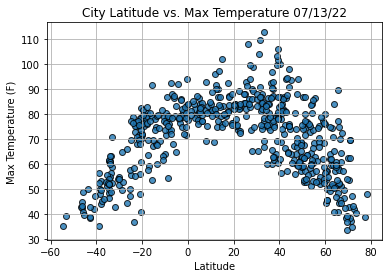

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

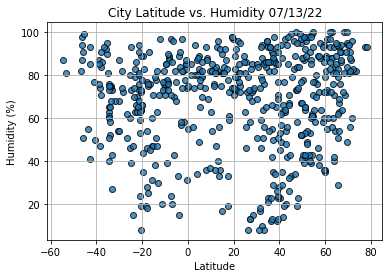

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

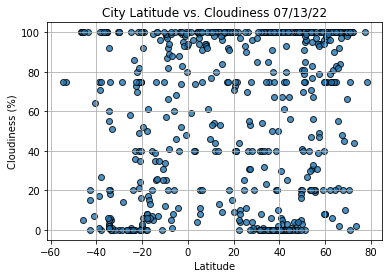

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

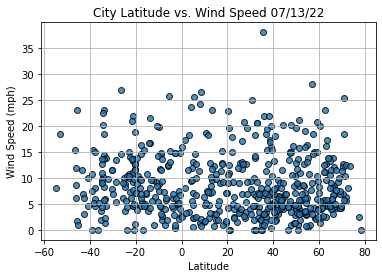

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()